In [33]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()

In [3]:
X_iris = iris.data
Y_iris = iris.target

In [4]:
# Creamos nuestro 'x' e 'y'
x = pd.DataFrame(iris.data, columns=['Sepal Lenght', 'Sepal Width', 'Petal Lenght', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])
x.head()

,Sepal Lenght,Sepal Width,Petal Lenght,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


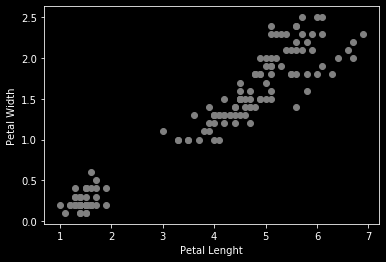

In [8]:
# Mostrar de manera visual el dataset Iris tomando en cuenta solo el largo y ancho del petalo
plt.style.use('dark_background')
plt.scatter(x['Petal Lenght'], x['Petal Width'], c='gray')
plt.xlabel('Petal Lenght', fontsize=10)
plt.ylabel('Petal Width', fontsize=10)
plt.show()

In [18]:
# Crear modelo, entrenarlo y obtener los labels
model = KMeans(n_clusters=3, max_iter=1000)
model.fit(x)
y_labels= model.labels_

In [19]:
# Obtener las predicciones que arroja nuestro modelo
y_kmeans = model.predict(x)
print('Predictions: ', y_kmeans)

Predictions:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [20]:
# Obtener la exactitud de nuestro modelo 
from sklearn import metrics

accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans)
print(accuracy*100)

73.02382722834697


Text(0, 0.5, 'Petal Width')

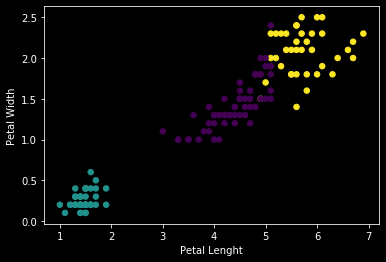

In [22]:
# Mostrar de manera visual las predicciones de nuestro modelo
plt.style.use('dark_background')
plt.scatter(x['Petal Lenght'], x['Petal Width'], c=y_kmeans, s=30)
plt.xlabel('Petal Lenght', fontsize=10)
plt.ylabel('Petal Width', fontsize=10)

In [23]:
# Ejercicio: Realizar un ejercicio similar con el dataset 'wines'

In [ ]:
# Importacion del dataset
wines = datasets.load_wine()

In [ ]:
# Obtencion de los datos de los vinos
X_wines = wines.data
Y_wines = wines.target

In [ ]:
# Crear la estructura de un dataframe
x = pd.DataFrame(X_wines, columns=['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash',
                                  'Magnesium', 'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
                                  'Proanthocyanins', 'Color Intensity', 'Hue', 
                                   'OD280/OD315 of diluted wines', 'Proline'])
y = pd.DataFrame(Y_wines, columns=['Target'])
x.head()

n_clusters: 1, accuracy: 0.0
n_clusters: 2, accuracy: 0.3694075388574537
n_clusters: 3, accuracy: 0.37111371823084754
n_clusters: 4, accuracy: 0.30344253157834694
n_clusters: 5, accuracy: 0.31158801033176253
n_clusters: 6, accuracy: 0.29090227688418224
n_clusters: 7, accuracy: 0.22632105878612552
n_clusters: 8, accuracy: 0.19933615927955298
n_clusters: 9, accuracy: 0.18197901068434116
n_clusters: 10, accuracy: 0.15432452307609384


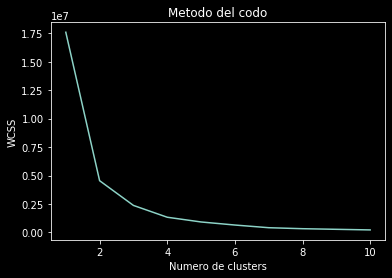

In [51]:
# Ploteo para encontrar el numero de clusters de acuerdo al metodo del codo
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    kmeans.fit(x)
    y_kmeans = kmeans.predict(x)
    wcss.append(kmeans.inertia_)
    accuracy = metrics.adjusted_rand_score(Y_wines, y_kmeans)
    print(f'n_clusters: {i}, accuracy: {accuracy}')

plt.style.use('dark_background')
plt.plot(range(1,11), wcss)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
# Aplicando el modelo KMeans
model = KMeans(n_clusters=3, max_iter=1000)
model.fit(x)
y_labels = model.labels_
y_kmeans = model.predict(x)
print('Predicciones: ', y_kmeans)
y_kmeans_df = pd.DataFrame(y_kmeans, columns=['Prediction'])

Predicciones:  [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]


In [53]:
# Obtenemos la exactitud 
accuracy = metrics.adjusted_rand_score(Y_wines, y_kmeans)
print(accuracy*100)

37.11137182308475


In [54]:
# Juntar el dataset con la prediccion
pred_wines = pd.concat([x, y_kmeans_df], axis=1)

A:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
A:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


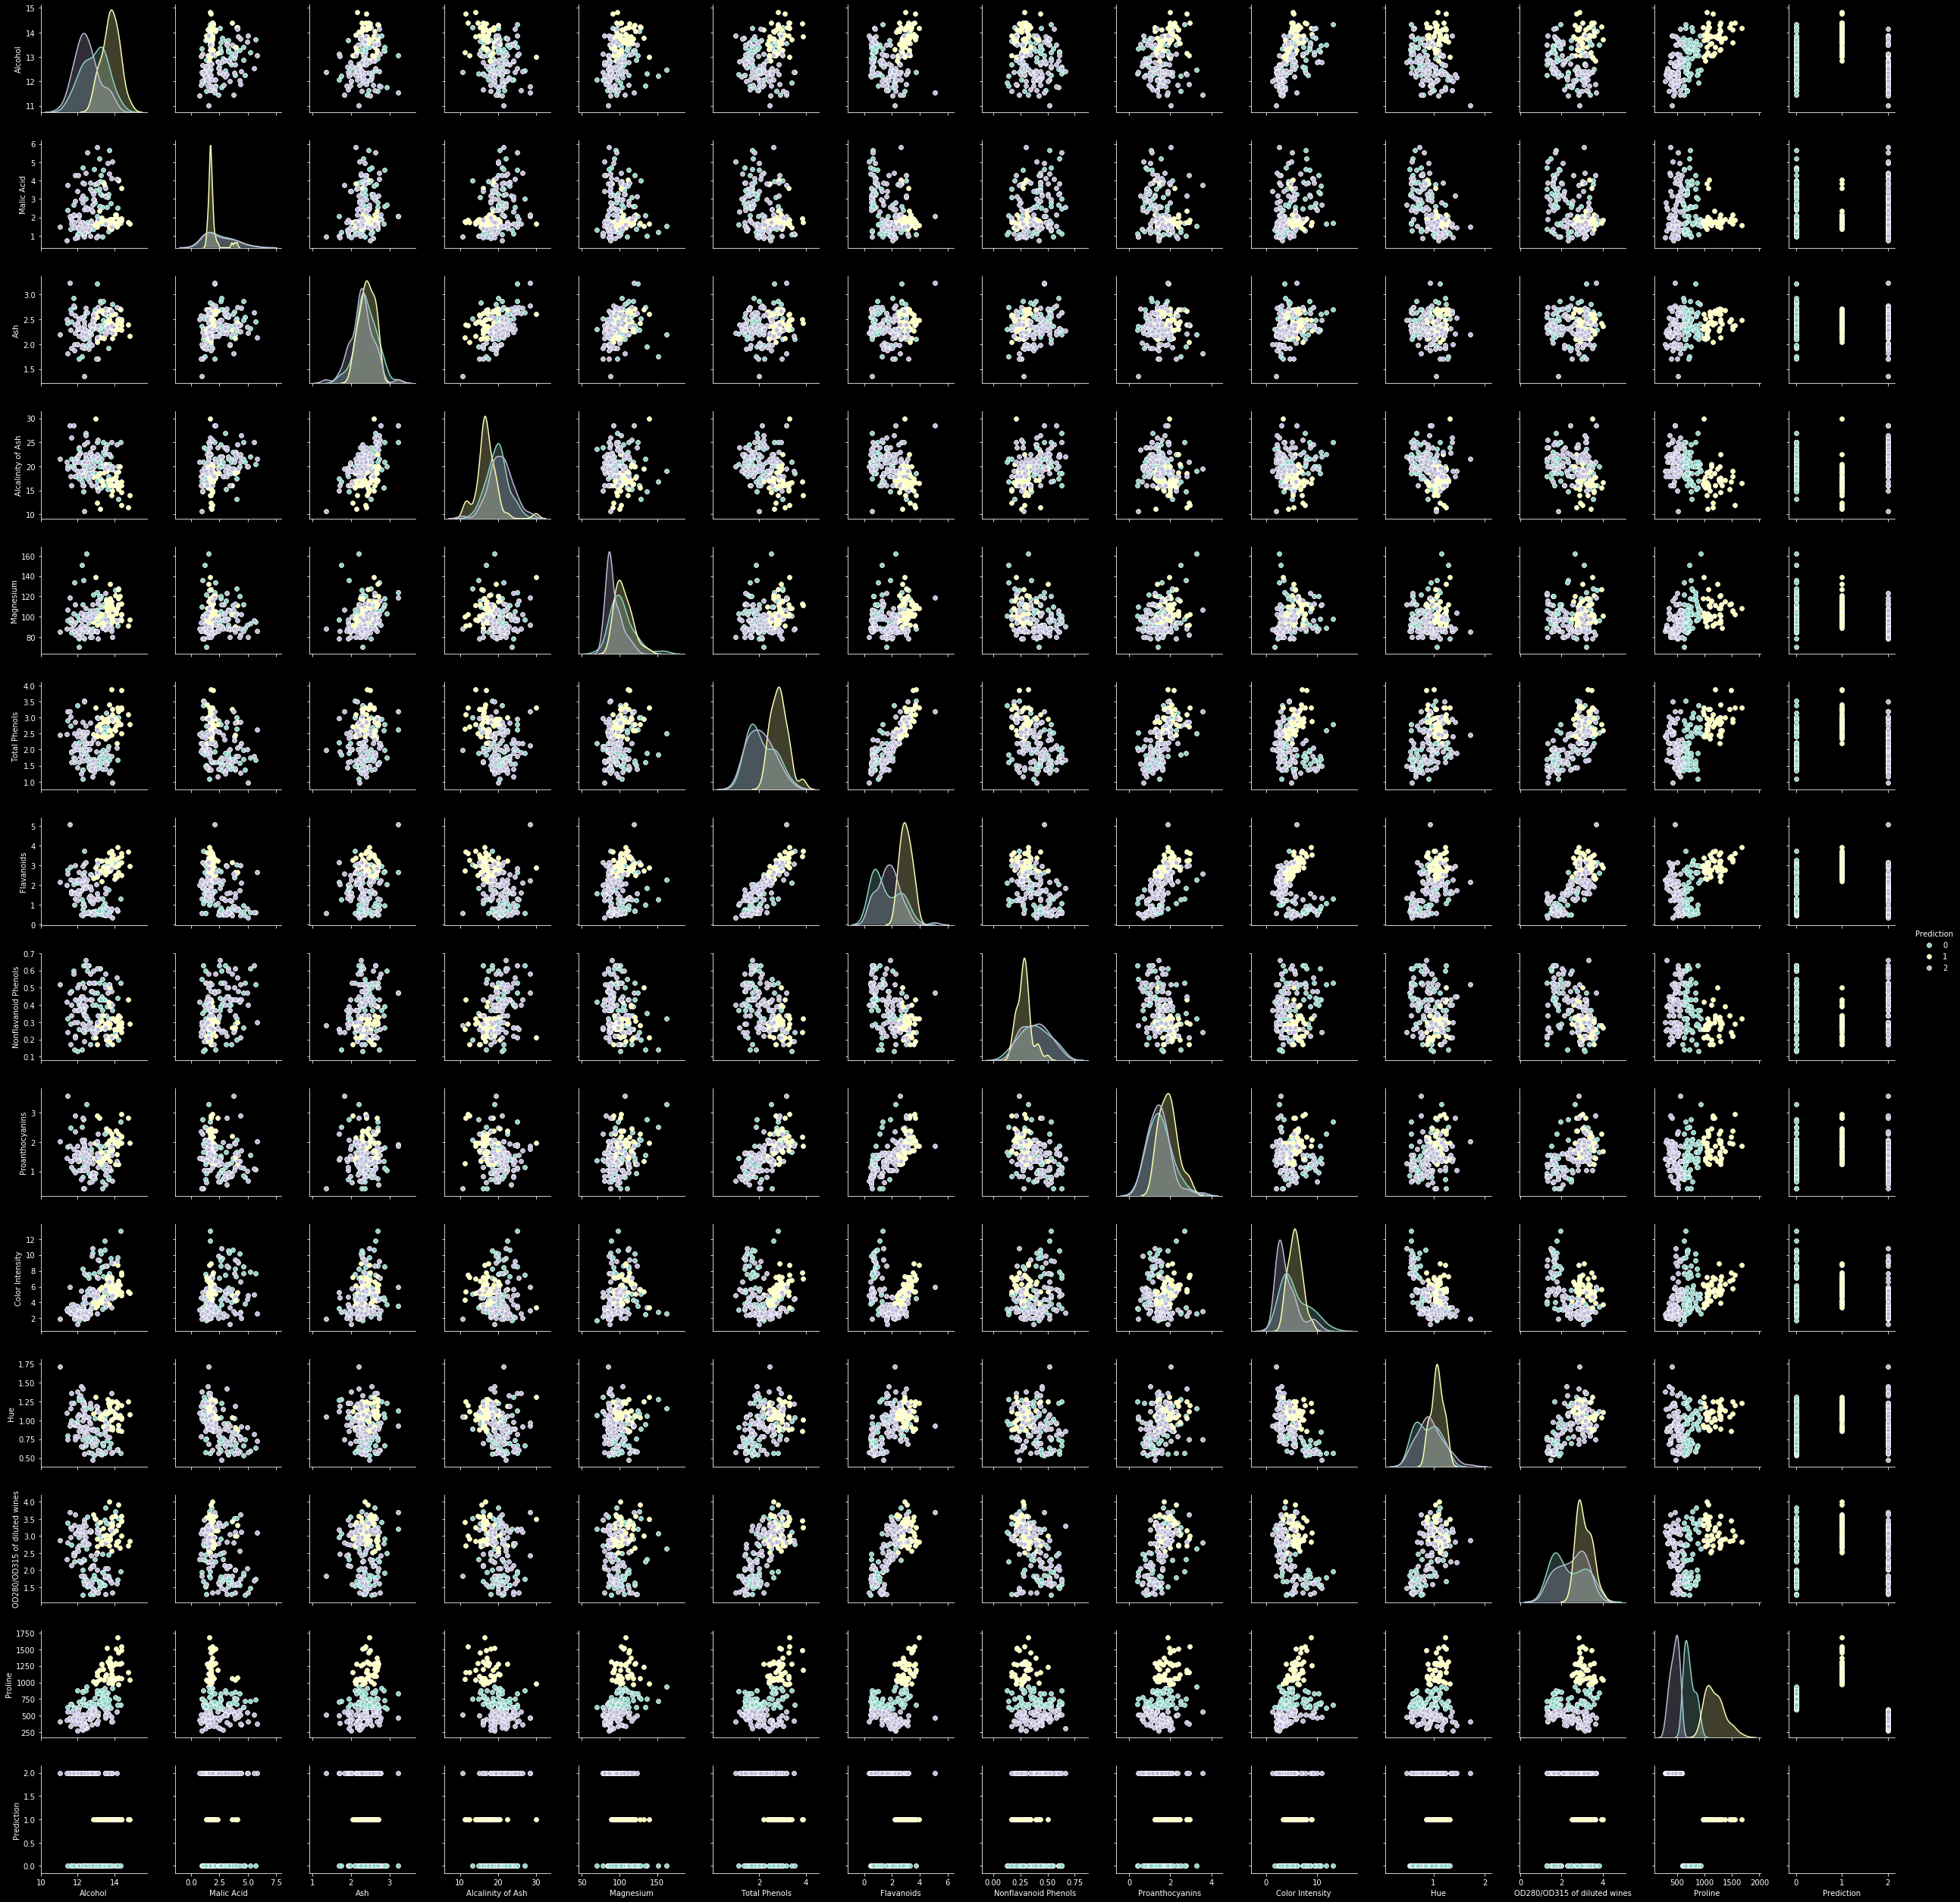

In [55]:
import seaborn as sns
sns.pairplot(pred_wines, hue='Prediction')